## Importing libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


### Training Image Processing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
   print(x,x.shape)
   print(y,y.shape)
   break


tf.Tensor(
[[[[ 73.75  67.75  79.75]
   [ 84.5   78.5   90.5 ]
   [ 78.75  72.75  84.75]
   ...
   [149.   151.   164.  ]
   [152.5  154.5  167.5 ]
   [146.5  148.5  161.5 ]]

  [[ 81.75  75.75  87.75]
   [ 81.    75.    87.  ]
   [ 84.25  78.25  90.25]
   ...
   [157.5  159.5  172.5 ]
   [156.25 158.25 171.25]
   [157.25 159.25 172.25]]

  [[ 79.5   73.5   85.5 ]
   [ 72.5   66.5   78.5 ]
   [ 85.75  79.75  91.75]
   ...
   [153.5  155.5  168.5 ]
   [158.25 160.25 173.25]
   [158.5  160.5  173.5 ]]

  ...

  [[ 58.25  58.25  60.25]
   [ 64.5   63.5   69.5 ]
   [ 68.5   65.5   76.5 ]
   ...
   [142.5  146.5  158.5 ]
   [142.25 146.25 158.25]
   [142.   146.   158.  ]]

  [[ 63.75  63.5   66.25]
   [ 68.75  67.75  73.75]
   [ 72.25  69.25  80.25]
   ...
   [139.   143.   155.  ]
   [139.25 143.25 155.25]
   [139.5  143.5  155.5 ]]

  [[ 65.    66.    70.  ]
   [ 70.75  71.75  76.75]
   [ 75.    73.    84.  ]
   ...
   [140.25 144.25 156.25]
   [141.25 145.25 157.25]
   [142.25 146.25 15

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

##### Building covulation Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Hello\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))



In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
## To avoid overfitting
model.add(Dropout(0.4))

In [17]:
##Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3277s 1s/step - accuracy: 0.4128 - loss: 2.0621 - val_accuracy: 0.8462 - val_loss: 0.4946
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3049s 1s/step - accuracy: 0.8418 - loss: 0.5069 - val_accuracy: 0.8983 - val_loss: 0.3267
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2965s 1s/step - accuracy: 0.9073 - loss: 0.2889 - val_accuracy: 0.9433 - val_loss: 0.1763
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3066s 1s/step - accuracy: 0.9387 - loss: 0.1897 - val_accuracy: 0.9521 - val_loss: 0.1444
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3115s 1s/step - accuracy: 0.9540 - loss: 0.1418 - val_accuracy: 0.9476 - val_loss: 0.1697
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2673s 1s/step - accuracy: 0.9624 - loss: 0.1142 - val_accuracy: 0.9502 - val_loss: 0.1636
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2630s 1s/step - accuracy: 0.9732 - loss: 0.0838 - val_accuracy: 0.9600 - val_loss: 0.1277
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2638s 1s/step - accuracy: 0.9756 - loss: 0.07

### Model Evaluation

In [21]:
#Model Evaluation on Training Set
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 625s 285ms/step - accuracy: 0.9921 - loss: 0.0253


In [22]:
print(train_loss,train_acc)

0.024582337588071823 0.9922184944152832


In [23]:
#Model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 156s 283ms/step - accuracy: 0.9657 - loss: 0.1177


In [24]:
print(val_loss,val_acc)

0.11111278086900711 0.9673343896865845


### Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.6161177754402161,
  0.8647698760032654,
  0.9171206951141357,
  0.9427697658538818,
  0.9561988711357117,
  0.9652606844902039,
  0.9725584983825684,
  0.9762145280838013,
  0.9785902500152588,
  0.9829006195068359],
 'loss': [1.2951571941375732,
  0.4310133159160614,
  0.25761160254478455,
  0.1760147362947464,
  0.1318996101617813,
  0.10561317950487137,
  0.08400380611419678,
  0.0733230859041214,
  0.06287051737308502,
  0.05447308346629143],
 'val_accuracy': [0.8462326526641846,
  0.8983041048049927,
  0.943261981010437,
  0.9520828723907471,
  0.9476439952850342,
  0.9502048492431641,
  0.9599931836128235,
  0.9594240784645081,
  0.9689847230911255,
  0.9673343896865845],
 'val_loss': [0.49460873007774353,
  0.32670170068740845,
  0.17634990811347961,
  0.14441171288490295,
  0.16970205307006836,
  0.16356520354747772,
  0.12766043841838837,
  0.1337735503911972,
  0.10505848377943039,
  0.1111128181219101]}

In [27]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

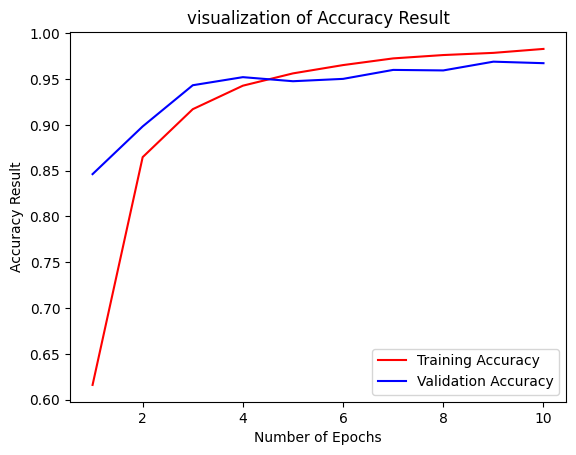

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 151s 274ms/step


(array([[1.00000000e+00, 2.01244710e-09, 8.84513018e-11, ...,
         1.24608711e-16, 1.77908649e-14, 1.28368873e-13],
        [9.97155190e-01, 2.40689376e-03, 9.34051332e-06, ...,
         2.48954829e-10, 2.87905122e-09, 1.05079216e-07],
        [1.00000000e+00, 7.83750453e-10, 6.25467400e-10, ...,
         1.81220603e-20, 4.39863091e-14, 6.92018871e-14],
        ...,
        [6.87709048e-12, 2.29176893e-13, 1.10651564e-10, ...,
         4.03382059e-12, 3.54309776e-11, 9.99996185e-01],
        [2.16983986e-09, 2.97564599e-12, 8.02645617e-10, ...,
         3.53735062e-11, 2.79364198e-10, 9.99999762e-01],
        [9.07964466e-24, 2.43055145e-24, 4.97338264e-21, ...,
         3.71848244e-24, 8.88784969e-22, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [32]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
import sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.96      0.95      0.96       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [38]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[481,   0,   0, ...,   0,   1,   1],
       [  1, 485,   0, ...,   0,   0,   0],
       [  0,   0, 425, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   1, ...,   0,   0, 477]])

### Visualizing Confusion Matrix

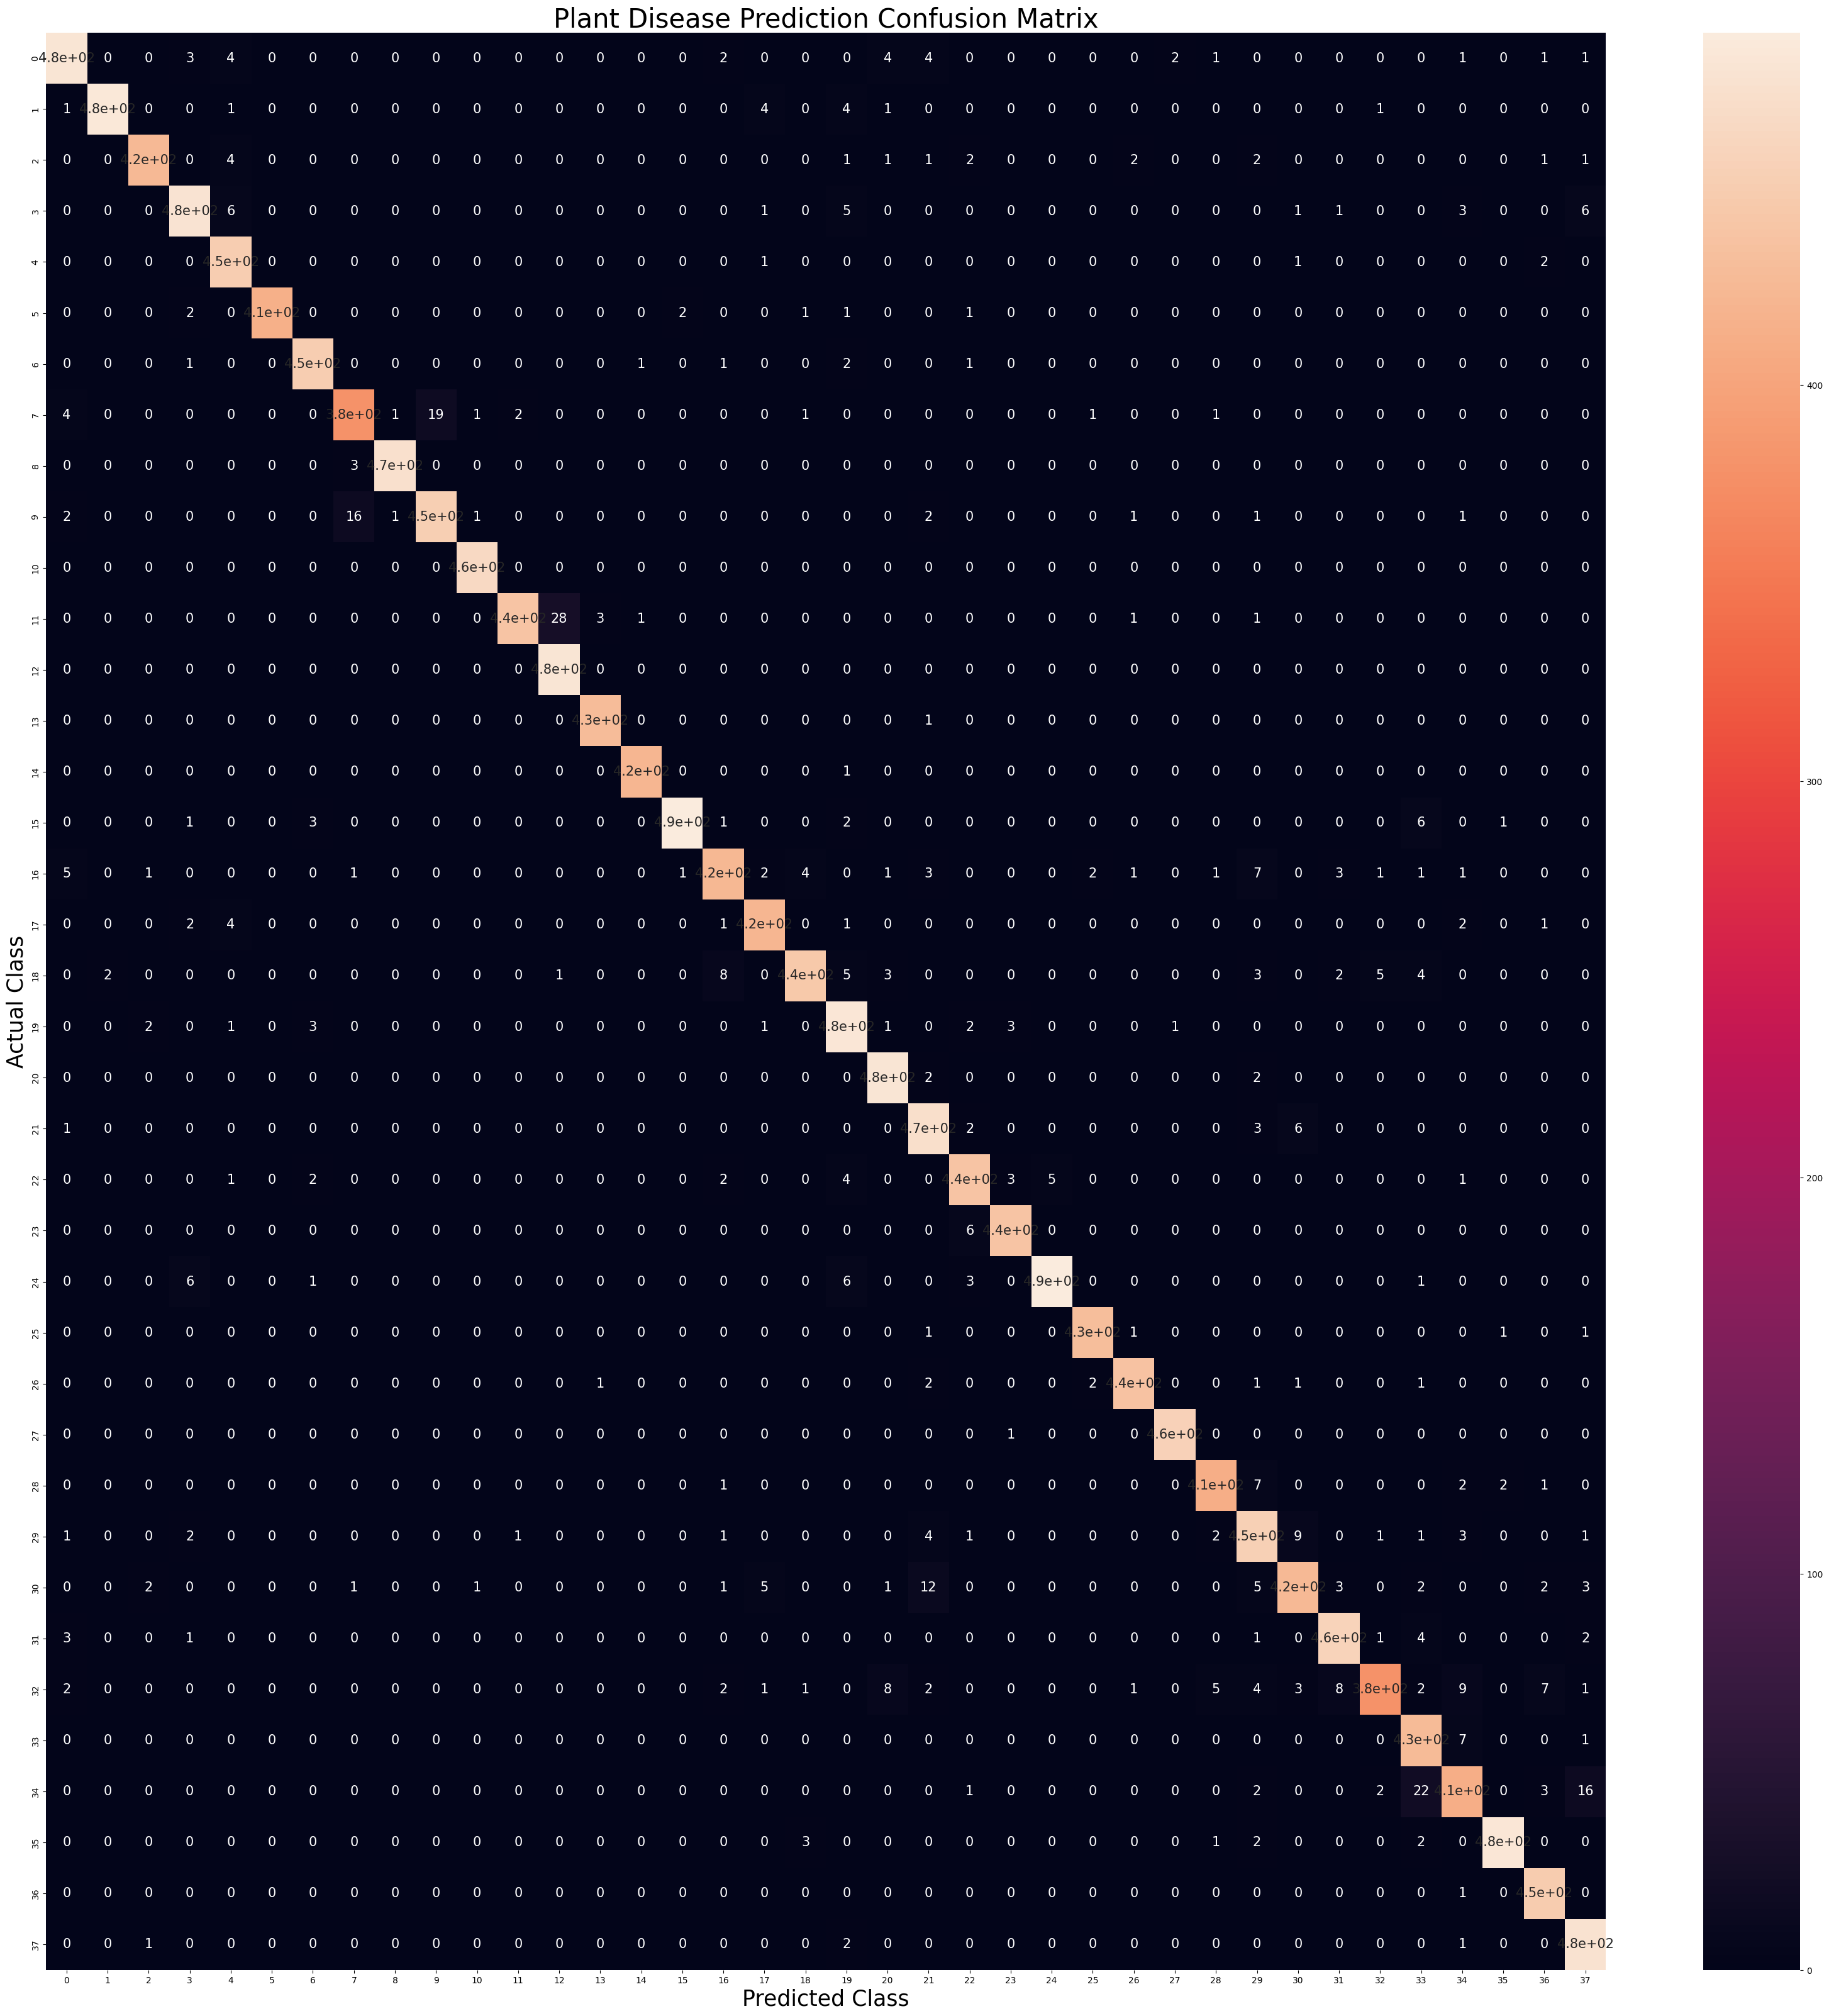

In [39]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=25)
plt.ylabel("Actual Class",fontsize=25)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()